In [ ]:
class Fuzzy():

    def __init__(self):
        self.min = 0
        self.max = 0

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, f):
        return self.max - f * (self.max - self.min)

    def rev_up(self, f):
        return f * (self.max - self.min) + self.min
# Down
# f = (max - x) / (max - min)
# f * (max - min) = max - x
# f * (max - min) - max = -x
# max - f * (max - min) = x
# x = max - f * (max - min)

# Up
# f = (x - min) / (max - min)
# f * (max - min) = x - min
# f * (max - min) + min = x
# x = f * (max - min) + min

In [ ]:
# Permintaan
# himp Turun / Naik
fis = Fuzzy()
fis.min = 1000
fis.max = 5000
x = 4000
# Turun
turun = fis.down(x)
print(f"Turun: {turun}")

# Turun
naik = fis.up(x)
print(f"Naik: {naik}")

Turun: 0.25
Naik: 0.75


In [ ]:
# Persediaan
# himp Sedikit / Banyak
fis = Fuzzy()
fis.min = 100
fis.max = 600
x = 300

# Sedikit
sedikit = fis.down(x)
print(f"Sedikit: {sedikit}")

# Banyak
banyak = fis.up(x)
print(f"Banyak: {banyak}")

Sedikit: 0.6
Banyak: 0.4


In [ ]:
# Berkurang 0.25 >> 5750
# Bertambah 0.4 >> 4000
# Bertambah 0.5 >> 5000

fis = Fuzzy()
fis.min = 2000
fis.max = 7000

# Berkurang
f = 0.25
berkurang = fis.rev_down(f)
print(f"berkurang({f}): {berkurang}")

# Bertambah
f = 0.4
bertambah = fis.rev_up(f)
print(f"bertambah({f}): {bertambah}")

f = 0.6
bertambah = fis.rev_up(f)
print(f"bertambah({f}): {bertambah}")

berkurang(0.25): 5750.0
bertambah(0.4): 4000.0
bertambah(0.6): 5000.0


In [ ]:
# Permintaan = Demand
# turun = decrease
# naik = increase
# Persediaan = Stock
# sedikit = a_few
# banyak = a_lot
# Produksi = Production
# berkurang = reduce
# bertambah = add

In [ ]:
class Demand(Fuzzy):

    def __init__(self):
        self.min = 1000
        self.max = 5000

    def decrease(self, x):
        if x < self.min:
            return 1

        if x > self.max:
            return 0

        return self.down(x)

    def increase(self, x):
        if x < self.min:
            return 0

        if x > self.max:
            return 1

        return self.up(x)

class Stock(Fuzzy):

    def __init__(self):
        self.min = 100
        self.max = 600

    def a_few(self, x):
        if x < self.min:
            return 1

        if x > self.max:
            return 0

        return self.down(x)
    def a_lot(self, x):
        if x < self.min:
            return 0

        if x > self.max:
            return 1

        return self.up(x)

class Production(Fuzzy):

    def __init__(self):
        self.min = 2000
        self.max = 7000

    def reduce(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def add(self, fuzzy_value):
        return self.rev_up(fuzzy_value)

In [ ]:
pmt = Demand()
pmt.increase(5000)

1.0

In [ ]:
psd = Stock()
psd.a_lot(450)

0.7

In [ ]:
prod = Production()
prod.add(0.6)

5000.0

In [ ]:
rule_mapping = {
    ("decrease", "a_lot"): "reduce",
    ("decrease", "a_few"): "reduce",
    ("increase", "a_lot"): "add",
    ("increase", "a_few"): "add",
}

In [ ]:
total_value = 0
total_fuzzy = 0
for k, v in rule_mapping.items():
    # print(f"{k[0]=}, {k[1]=}")
    # print(f"{v=}")
    demand = Demand()
    stock = Stock()
    demand_value = 4000
    stock_value = 300

    fuzzy_demand = demand.decrease(demand_value) if k[0] == "decrease" else demand.increase(demand_value)
    fuzzy_stock = stock.a_few(stock_value) if k[1] == "a_few" else stock.a_lot(stock_value)

    prod = Production()
    fuzzy_prod = min(fuzzy_demand, fuzzy_stock)
    prod_value = prod.reduce(fuzzy_prod) if v == "reduce" else prod.add(fuzzy_prod)

    total_value += fuzzy_prod * prod_value
    total_fuzzy += fuzzy_prod

result = int(total_value/ total_fuzzy)
result
print(f"Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak {result} kemasan.")

Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak 4983 kemasan.


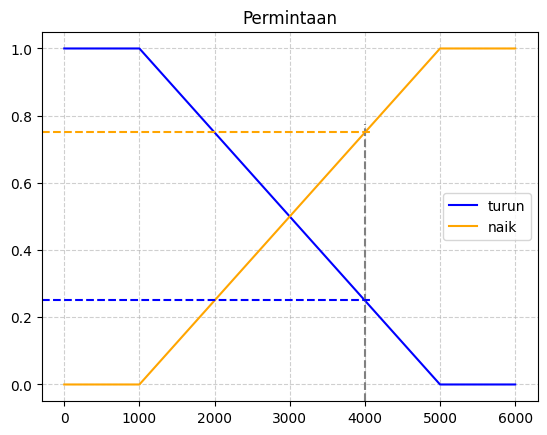

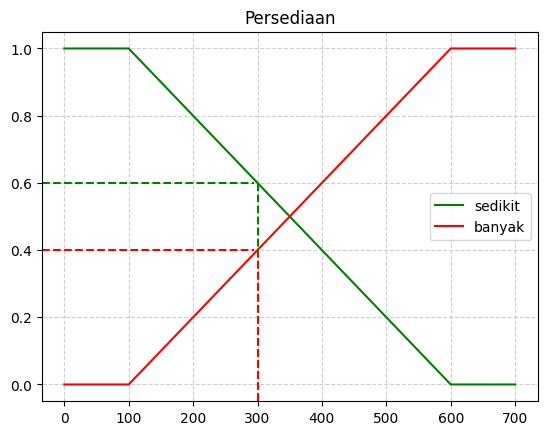

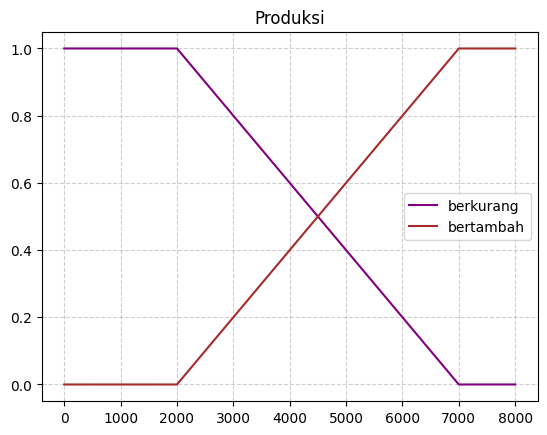

In [ ]:
import matplotlib.pyplot as plt

# Fungsi fuzzy
def calculate_membership(x_values, min_val, max_val, direction):
    y_values = []
    for x in x_values:
        if direction == "down":
            y = (max_val - x) / (max_val - min_val) if min_val <= x <= max_val else (1 if x < min_val else 0)
        elif direction == "up":
            y = (x - min_val) / (max_val - min_val) if min_val <= x <= max_val else (0 if x < min_val else 1)
        y_values.append(y)
    return y_values

def add_dashed_lines_for_demand(x_value, y_values, y1, y2):
    plt.axvline(x=x_value, ymin=0, ymax=y2, color="gray", linestyle="--")
    plt.axhline(y=y1, xmin=0, xmax=x_value / max(x_permintaan), color="blue", linestyle="--")
    plt.axhline(y=y2, xmin=0, xmax=x_value / max(x_permintaan), color="orange", linestyle="--")

# Variabel
demand_min, demand_max = 1000, 5000
stock_min, stock_max = 100, 600
production_min, production_max = 2000, 7000

x_demand_value = 4000  # Nilai x untuk permintaan
fuzzy_demand_turun = (demand_max - x_demand_value) / (demand_max - demand_min)
fuzzy_demand_naik = (x_demand_value - demand_min) / (demand_max - demand_min)

# Grafik Permintaan
x_permintaan = [i for i in range(0, 6001, 100)]
turun = calculate_membership(x_permintaan, demand_min, demand_max, "down")
naik = calculate_membership(x_permintaan, demand_min, demand_max, "up")

plt.figure()
plt.plot(x_permintaan, turun, label="turun", color="blue")
plt.plot(x_permintaan, naik, label="naik", color="orange")
add_dashed_lines_for_demand(x_demand_value, turun, fuzzy_demand_turun, fuzzy_demand_naik)
plt.title("Permintaan")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Grafik Persediaan
x_persediaan = [i for i in range(0, 701, 10)]
sedikit = calculate_membership(x_persediaan, stock_min, stock_max, "down")
banyak = calculate_membership(x_persediaan, stock_min, stock_max, "up")
fuzzy_stock_sedikit = 0.6
fuzzy_stock_banyak = 0.4

plt.figure()
plt.plot(x_persediaan, sedikit, label="sedikit", color="green")
plt.plot(x_persediaan, banyak, label="banyak", color="red")
plt.axhline(y=fuzzy_stock_sedikit, xmin=0, xmax=300 / max(x_persediaan), color="green", linestyle="--")
plt.axvline(x=300, ymin=0, ymax=fuzzy_stock_sedikit, color="green", linestyle="--")
plt.axhline(y=fuzzy_stock_banyak, xmin=0, xmax=300 / max(x_persediaan), color="red", linestyle="--")
plt.axvline(x=300, ymin=0, ymax=fuzzy_stock_banyak, color="red", linestyle="--")
plt.title("Persediaan")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Grafik Produksi
x_produksi = [i for i in range(0, 8001, 200)]
berkurang = calculate_membership(x_produksi, production_min, production_max, "down")
bertambah = calculate_membership(x_produksi, production_min, production_max, "up")

plt.figure()
plt.plot(x_produksi, berkurang, label="berkurang", color="purple")
plt.plot(x_produksi, bertambah, label="bertambah", color="brown")
plt.title("Produksi")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()